# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_ride_count_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_count_by_type.head()



type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fare_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_ride_count_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_type = total_fare_by_type / total_ride_count_by_type
average_fare_per_type



type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fare_by_type / total_drivers_by_type
average_fare_per_driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
ride_summary_df = pd.DataFrame(
          {"Total Rides": total_ride_count_by_type,
          "Total Drivers": total_drivers_by_type,
          "Total Fares": total_ride_count_by_type,
          "Average Fare per Ride": average_fare_per_type,
          "Average Fare per Driver": average_fare_per_driver})
ride_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,125,34.623440,55.486282
Suburban,625,490,625,30.970128,39.502714
Urban,1625,2405,1625,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
ride_summary_df.index.name = None

In [10]:
#  8. Format the columns.# look at other integers

ride_summary_df["Total Fares"] = ride_summary_df["Total Fares"].map("${:.2f}".format)

ride_summary_df["Average Fare per Ride"] = ride_summary_df["Average Fare per Ride"].map("${:.2f}".format)

ride_summary_df["Average Fare per Driver"] = ride_summary_df["Average Fare per Driver"].map("${:.2f}".format)

ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,$125.00,$34.62,$55.49
Suburban,625,490,$625.00,$30.97,$39.50
Urban,1625,2405,$1625.00,$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fares_by_type = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]

sum_fares_by_type

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sum_fares_by_type= sum_fares_by_type.reset_index()
sum_fares_by_type

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

sum_fares_by_type_pivot = sum_fares_by_type.pivot(index="date", columns="type", values="fare")
sum_fares_by_type_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_by_date = sum_fares_by_type_pivot.loc['2019-01-01':'2019-04-29']
fares_by_date


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8..index = pd.todatetime(df.index
fares_by_date.index = pd.to_datetime(fares_by_date.index)


In [17]:
fares_by_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
city_types = pyber_data_df.set_index(["type"])
city_types

,city,date,fare,ride_id,driver_count
type,,,,,
Urban,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5
Urban,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72
Urban,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57
Urban,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34
Urban,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46
...,...,...,...,...,...
Rural,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6
Rural,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2
Rural,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1


In [19]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_by_date.dtypes

type
Rural       float64
Suburban    float64
Urban       float64
dtype: object

In [20]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

resample_fares_by_date_df = fares_by_date.resample('W').count()
resample_fares_by_date_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,5,22,66
2019-01-13,3,35,80
2019-01-20,8,41,84
2019-01-27,6,34,84
2019-02-03,9,32,88
2019-02-10,4,31,94
2019-02-17,3,34,86
2019-02-24,11,43,103
2019-03-03,5,30,88


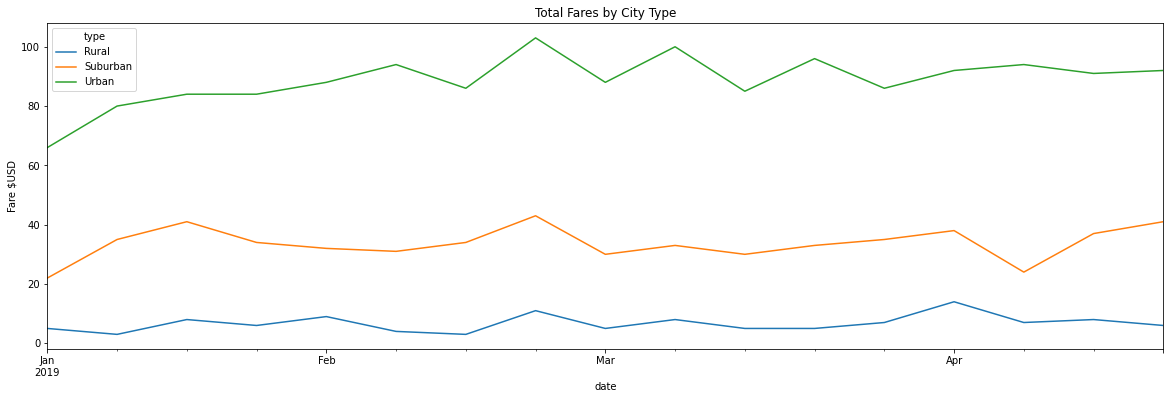

<Figure size 432x288 with 0 Axes>

In [22]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function.#  Add a x- and y-axis label.
#resample_fares_by_date.set_xlabel("Jan", "Feb", "Mar", "April") 
import matplotlib.pyplot as plt

resample_fares_by_date_df = resample_fares_by_date_df.plot(figsize = (20,6))



# Add a title 
resample_fares_by_date_df.set_title("Total Fares by City Type")

resample_fares_by_date_df.set_ylabel("Fare $USD")
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')



plt.show()
plt.tight_layout()



In [24]:
#
plt.savefig('Total_Fares_By_City_Type.png')

<Figure size 432x288 with 0 Axes>